# Testbench for `dense_w7()`

In [ ]:
#
# Copyright (C) 2024, Advanced Micro Devices, Inc. All rights reserved.
# SPDX-License-Identifier: MIT
#
# Author: Mark Rollins

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision
import numpy as np
import os.path

2024-10-01 18:17:03.550520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 18:17:03.554336: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 18:17:03.562014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 18:17:03.573026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 18:17:03.576285: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 18:17:03.586954: I tensorflow/core/platform/cpu_feature_gu

## Layer Definition

In [2]:
inputs = keras.Input(shape=(28,28,1),name="input")
x1 = layers.Conv2D(filters=16,kernel_size=3,activation="relu",name="conv2d_w1")(inputs)
x2 = layers.MaxPooling2D(pool_size=2,name="max_pooling2d_w2")(x1)
x3 = layers.Conv2D(filters=64,kernel_size=3,activation="relu",name="conv2d_w3")(x2)
x4 = layers.MaxPooling2D(pool_size=2,name="max_pooling2d_w4")(x3)
outputs = layers.Conv2D(filters=128,kernel_size=3,activation="relu",name="conv2d_w5")(x4)
model_stim = keras.Model(inputs=inputs,outputs=outputs,name="Stimulus")
w1_taps = ((np.loadtxt('../conv2d_w1/taps_trained.txt')).astype("bfloat16")).astype("float32")
w1_taps = np.reshape(w1_taps,(3,3,1,16))
w1_taps = (w1_taps.astype("bfloat16")).astype("float32")
w1_bias = ((np.loadtxt('../conv2d_w1/bias_trained.txt')).astype("bfloat16")).astype("float32")
w1_bias = (w1_bias.astype("bfloat16")).astype("float32")
w3_taps = ((np.loadtxt('../conv2d_w3/taps_trained.txt')).astype("bfloat16")).astype("float32")
w3_taps = np.reshape(w3_taps,(3,3,16,64))
w3_taps = (w3_taps.astype("bfloat16")).astype("float32")
w3_bias = ((np.loadtxt('../conv2d_w3/bias_trained.txt')).astype("bfloat16")).astype("float32")
w3_bias = (w3_bias.astype("bfloat16")).astype("float32")
w5_taps = ((np.loadtxt('../conv2d_w5/taps_trained.txt')).astype("bfloat16")).astype("float32")
w5_taps = np.reshape(w5_taps,(3,3,64,128))
w5_taps = (w5_taps.astype("bfloat16")).astype("float32")
w5_bias = ((np.loadtxt('../conv2d_w5/bias_trained.txt')).astype("bfloat16")).astype("float32")
w5_bias = (w5_bias.astype("bfloat16")).astype("float32")
model_stim.set_weights((w1_taps,w1_bias,w3_taps,w3_bias,w5_taps,w5_bias))

In [3]:
model_stim.summary()

Model: "Stimulus"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w1 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_w2 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w3 (Conv2D)              │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_w4 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w5 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,296 (325.38 KB)

 Trainable params: 83,296 (325.38 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
inputs = keras.Input(shape=(3,3,128),name="input_layer")
x1 = layers.Flatten(name="flatten_w6")(inputs)
outputs = layers.Dense(10,activation="softmax",name="dense_w7")(x1)
model = keras.Model(inputs=inputs,outputs=outputs,name="dut")
w7_taps = ((np.loadtxt('taps_trained.txt')).astype("bfloat16")).astype("float32")
w7_taps = np.reshape(w7_taps,(1152,10))
w7_taps = (w7_taps.astype("bfloat16")).astype("float32")
w7_bias = ((np.loadtxt('bias_trained.txt')).astype("bfloat16")).astype("float32")
w7_bias = (w7_bias.astype("bfloat16")).astype("float32")
model.set_weights((w7_taps,w7_bias))

In [5]:
model.summary()

Model: "dut"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_w6 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_w7 (Dense)                │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,530 (45.04 KB)

 Trainable params: 11,530 (45.04 KB)

 Non-trainable params: 0 (0.00 B)

## Load NMIST Images

In [6]:
# Set batch size and # of batches
BS=1
NB_tst = 4
# Load MNIST database:
(trn_images,trn_labels), (tst_images,tst_labels) = mnist.load_data()
tst_images = tst_images.reshape((10000,28,28,1))
tst_images = tst_images[:NB_tst*BS,:,:,:]
# Extract usable data:
tst_labels = tst_labels[:NB_tst*BS]
tst_images = tst_images.astype("float32") / 255
tst_inputs = model_stim.predict(tst_images,batch_size=1)
tst_inputs = (tst_inputs.astype("bfloat16")).astype("float32")
use_inputs = np.zeros((4,3,8,128),dtype="float32")
use_inputs[:,:,0:3,:] = tst_inputs

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


## Compute Golden Outputs

In [7]:
predict = model.predict(tst_inputs,batch_size=1)
predict = (predict.astype("bfloat16")).astype("float32")
print(predict.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
(4, 10)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step


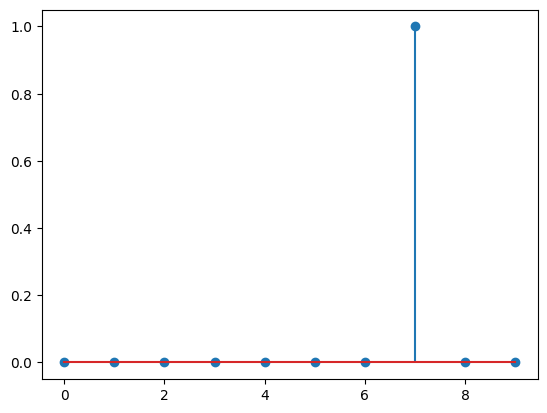

In [8]:
predict = model.predict(tst_inputs,batch_size=1)
predict = (predict.astype("bfloat16")).astype("float32")
plt.stem(predict[0,:])
plt.show()

## Store Layer Inputs

In [9]:
np.savetxt('data/ifm_i.txt',np.reshape(use_inputs,(-1,4)),fmt='%f %f %f %f')
ifm_i = np.reshape(use_inputs,(-1,1))

## Store Layer Outputs

In [10]:
np.savetxt('data/ofm_o.txt',np.reshape(predict,(-1,4)),fmt='%f %f %f %f')
ofm_o = np.reshape(predict,(-1,1))

## Store Weights & Bias

In [11]:
# We need to zero-pad weights by 6 for DM alignment & 64-bit PLIO
taps = np.reshape(w7_taps,(1152,10))
taps = np.transpose(taps,(1,0))
taps = np.concatenate((np.reshape(taps,(-1,1)),np.reshape(w7_bias,(-1,1))),axis=0)
taps = np.concatenate((taps,np.zeros((6,1))),axis=0)
np.savetxt('data/wts_i.txt',np.reshape(taps,(-1,4)),fmt='%f %f %f %f')
wts_i = np.reshape(taps,(-1,1))

## Run Vitis Functional Simulation

In [12]:
import os
import vfs
dense_w7_graph = vfs.aieGraph(
    input_file='dense_w7_app.cpp',
    part="xcve2802-vsvh1760-2MP-e-S",
    include_paths=['./','../mnist','../wts_init'])
act_o = dense_w7_graph.run(vfs.array(ifm_i[:,0],vfs.bfloat16),vfs.array(wts_i[:,0],vfs.bfloat16))

Loaded AIEGraph


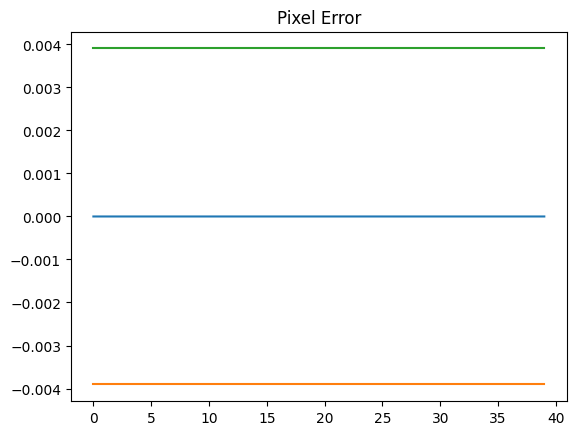

In [13]:
act_o = np.array(act_o)
act_o = np.transpose(np.reshape(act_o,(4,16)),(0,1))
ofm_o = np.transpose(np.reshape(ofm_o,(4,10)),(0,1))
act_o = act_o[:,:10]   # Remove zero pad
err = np.reshape(ofm_o-act_o,(-1,1))
tmp = np.reshape(ofm_o,(-1,1))
lvl = np.max(np.abs(tmp))
lvl_min = -(0.5**8)*lvl*np.ones((len(tmp),1))
lvl_max = +(0.5**8)*lvl*np.ones((len(tmp),1))
tt = np.arange(0,len(tmp))
plt.plot(tt,err,tt,lvl_min,tt,lvl_max)
plt.title("Pixel Error")
plt.show()